In [1]:
import pandas as pd

website_traffic  = pd.read_csv('website_traffic.csv')
website_traffic 

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


In [2]:
correlation = website_traffic.corr(numeric_only=True)
print("Correlation DataFrame:")
correlation

Correlation DataFrame:


,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
Page Views,1.000000,-0.012788,0.030223,0.023941,0.028595,0.126635
Session Duration,-0.012788,1.000000,-0.015931,-0.013985,-0.025534,0.177798
Bounce Rate,0.030223,-0.015931,1.000000,0.039340,-0.015860,-0.049051
Time on Page,0.023941,-0.013985,0.039340,1.000000,-0.028729,0.229669
Previous Visits,0.028595,-0.025534,-0.015860,-0.028729,1.000000,0.109496
Conversion Rate,0.126635,0.177798,-0.049051,0.229669,0.109496,1.000000


In [3]:
positive_corr = correlation['Conversion Rate'][correlation['Conversion Rate'] > 0]
positive_corr_df = pd.DataFrame(positive_corr).reset_index()
positive_corr_df.columns = ['Feature', 'Correlation with Conversion Rate']
print("Features with positive correlation to 'Conversion Rate':")
positive_corr_df

Features with positive correlation to 'Conversion Rate':


,Feature,Correlation with Conversion Rate
0,Page Views,0.126635
1,Session Duration,0.177798
2,Time on Page,0.229669
3,Previous Visits,0.109496
4,Conversion Rate,1.000000


In [5]:
target_variable = 'Conversion Rate'

In [7]:
from sklearn.model_selection import train_test_split

features = positive_corr_df['Feature'].tolist()  # 选择正相关的特征作为预测因子
X = website_traffic[features].drop(columns=[target_variable])  # 自变量
y = website_traffic[target_variable]  # 目标变量

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.03169167945402102


In [9]:
print(f"MAE Analysis: The MAE of {mae} suggests the average absolute error between the predicted and actual Conversion Rates.")

MAE Analysis: The MAE of 0.03169167945402102 suggests the average absolute error between the predicted and actual Conversion Rates.


MAE Analysis: The MAE value is mae, indicating that the average absolute error between the predicted conversion rate and the actual conversion rate is this value. 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

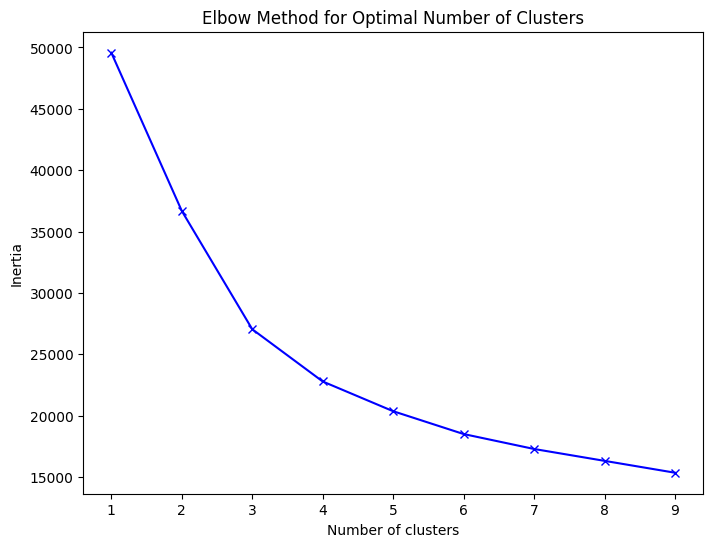

In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [11]:
optimal_k = 3  # 假设我们通过肘部法则确定了3个是最佳聚类数
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X)
clusters

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 1, 1, ..., 2, 0, 0], dtype=int32)

In [12]:
clustered_data = pd.concat([X, pd.DataFrame(clusters, columns=['Cluster'])], axis=1)
cluster_means = clustered_data.groupby('Cluster').mean()
print("Mean values for each cluster:")
cluster_means

Mean values for each cluster:


,Page Views,Session Duration,Time on Page,Previous Visits
Cluster,,,,
0,4.936482,1.839931,2.674633,2.022801
1,5.053691,2.187004,8.218994,1.955257
2,4.861538,8.637118,3.373963,1.843077


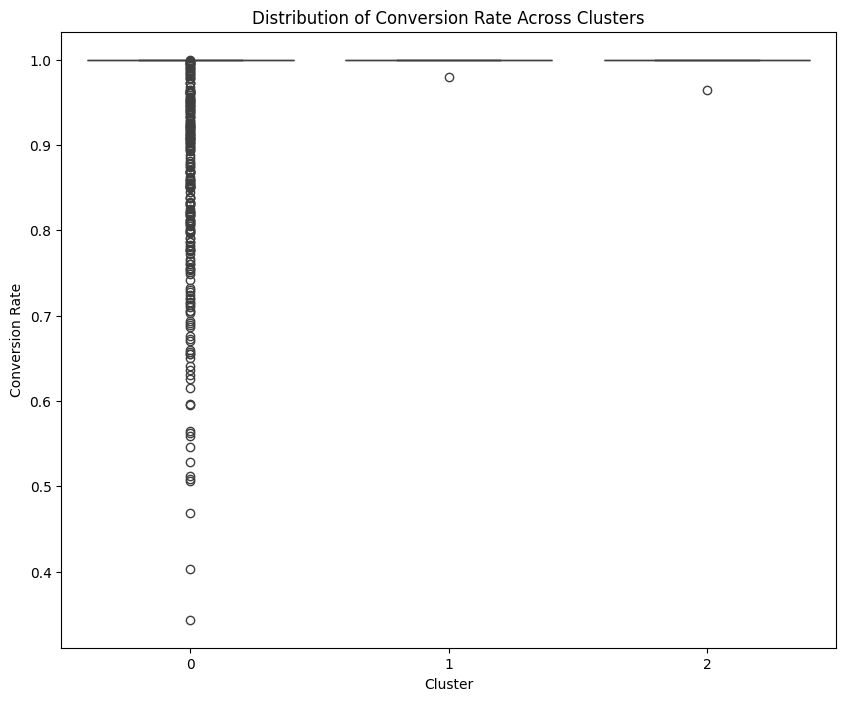

In [13]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.boxplot(x='Cluster', y='Conversion Rate', data=pd.concat([X, pd.DataFrame(y, columns=[target_variable]), pd.DataFrame(clusters, columns=['Cluster'])], axis=1))
plt.title('Distribution of Conversion Rate Across Clusters')
plt.show()

Cluster Analysis:
Cluster 0: This cluster exhibits a wide range of conversion rates, with a significant number of data points scattered below the 1.0 mark. The conversion rates in this cluster vary considerably, with many outliers, particularly in the lower range between 0.4 and 0.6. While the median conversion rate appears to be close to 1.0, the spread of the data suggests a high degree of variability within this cluster.

Cluster 1: In contrast, Cluster 1 shows very few data points, all of which have conversion rates close to 1.0. There are a couple of minor outliers slightly below this value, but overall, the conversion rates in this cluster are highly consistent and predominantly high

Cluster 2: Similar to Cluster 1, Cluster 2 also contains few data points with conversion rates primarily at 1.0. Although there are some minor outliers below this value, the overall distribution is still concentrated at the top end, reflecting high and consistent conversion rates

Visualization support
By visualizing the distribution of capabilities in special clusters thru boxplot, you can intuitively see which functions have vast differences between one-of-a-kind clusters, thereby helping to further perceive patterns and insights.

Patterns and Insights:
By observing the distribution of features in each cluster, we can identify which features are driving the conversion rate differences between different clusters. For example, a cluster 0  show a higher conversion rate due to a specific source of visit or higher page views.

Summary
By comprehensively analyzing MAE and clustering results, we can better understand the patterns and user behaviors in the data, thereby providing data-driven support for optimizing websites and marketing strategies.